## Backpropagation Example Implementation

This example has been adapted form the below blog post:

https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

For the mathematical explaination read my blog post and neural network fundamentals series here:

https://samzee.net/2019/02/20/neural-networks-learning-the-basics-backpropagation/

The standard process for building the neural network is as follows:
1. Initialize Network
2. Forward Propagate
3. Back Propagate Error
4. Train Network

### Reproduce example in blog post

In [223]:
import numpy as np
import random
import io
import pandas as pd
import plotly.express as px
import numpy

In [224]:
def initialze_network(n_input, n_hidden, n_output):
    network = []
    hidden_layer = {'weights': [np.random.rand(n_input,n_hidden) , np.random.rand(n_hidden)]}
    network.append(hidden_layer)
    output_layer = {'weights': [np.random.rand(n_hidden,n_output) , np.random.rand(n_output)]}
    network.append(output_layer)
    return network
#defines sigmoid function
def sigmoid(x):
    s = 1/(1 + np.exp(-x))
    return s
#derivative of the loss function delta rule
def dloss(target, output):
    error = -(target - output)
    return error

In [225]:
#create the network
random.seed(1)
network = initialze_network(2, 2, 2)
weights = [neuron['weights'] for neuron in network]

In [226]:
#testing example
x = np.array([[0.15,0.2],[0.25,0.3]])
z = np.array([[0.4,0.45],[0.50,0.55]])
inputs = np.array([0.05, 0.1])
target = np.array([0.01, 0.99])

In [227]:
#update randomised inputs to fixed inputs
weights[0][0] = x
weights[1][0] = z
weights[0][1] = np.array([0.35, 0.35]) #removed bias from the hidden layer
weights[1][1] = np.array([0.6, 0.6])

In [228]:
#forward pass
def forward_pass(weights, inputs, bias):
    a = np.dot(weights, inputs) + bias
    return a

In [229]:
a_hidden = forward_pass(weights[0][0], inputs, weights[0][1])
#activation
a_hidden = sigmoid(a_hidden)
#output
outputs = forward_pass(weights[1][0], a_hidden, weights[1][1])
#activation
outputs = sigmoid(outputs)

In [230]:
#the backward pass outputs
def out_gradient(target, output, inputs):
    gradient = (dloss(target, output)*output*(1- output))*inputs
    return gradient

In [231]:
def bias_gradient(target, output):
    gradient = dloss(target, output)
    return gradient

In [232]:
grad = [out_gradient(target, outputs, item) for item in a_hidden]

In [233]:
#output gradients
gradients = np.vstack(grad).T
gradients

array([[ 0.08216704,  0.08266763],
       [-0.02260254, -0.02274024]])

In [234]:
bias_grad = bias_gradient(target, outputs) 

In [235]:
#one hidden layer back prop
def hid_gradient(target, output, inputs, a, weight):
    k = np.sum((-(target - output)*output*(1 - output))*weight) #the first column of a matrix
    g = a*(1- a)*inputs
    return g*k

In [236]:
#apply
w = weights[1][0].T
h_gradients = []
for item in w:
    grad = hid_gradient(target, outputs, inputs, a_hidden, item)
    h_gradients.append(grad)
mygrad = np.vstack(h_gradients).T
mygrad

array([[0.00043857, 0.00049913],
       [0.00087464, 0.00099543]])

In [237]:
#set the learning rate
#update weights
l = 0.5
weights[0][0] = weights[0][0] - l*mygrad
weights[1][0] = weights[1][0] - l*gradients
weights[1][1] = weights[1][1] - 1*bias_grad

In [238]:
weights

[[array([[0.14978072, 0.19975043],
         [0.24956268, 0.29950229]]), array([0.35, 0.35])],
 [array([[0.35891648, 0.40866619],
         [0.51130127, 0.56137012]]), array([-0.14136507,  0.81707153])]]

## Put Everything Together

In [239]:
def initialze_network(n_input, n_hidden, n_output):
    network = []
    hidden_layer = {'weights': [[np.random.rand(n_input,n_hidden)] , [0]]}
    network.append(hidden_layer)
    output_layer = {'weights': [[np.random.rand(n_hidden,n_output)] , [random.random()]]}
    network.append(output_layer)
    return network
#forward pass
def forward_pass(weights, inputs, bias):
    a = np.dot(weights, inputs) + bias
    return a
def out_gradient(target, output, inputs):
    gradient = (dloss(target, output)*output*(1- output))*inputs
    return gradient
def bias_gradient(target, output):
    gradient = dloss(target, output)
    return gradient
#one hidden layer back prop
def hid_gradient(target, output, inputs, a, weight):
    k = np.sum((-(target - output)*output*(1 - output))*weight) #the first column of a matrix
    g = a*(1- a)*inputs
    return g*k

#loss function
def lossfunction(target,output):
    loss = (1/2)*(target - output)**2
    return loss

In [256]:
def train_network(network, inputs, target, l, n_epoch):
    weights = [neuron['weights'] for neuron in network]
    for epoch in range(n_epoch):
        myloss = []
        h_gradients = []
        for i in range(len(inputs)):
            a_hidden = forward_pass(weights[0][0][0], inputs[i], weights[0][1])
            a_hidden = sigmoid(a_hidden) #apply activation
            outputs = forward_pass(weights[1][0][0].T, a_hidden, weights[1][1])
            outputs = sigmoid(outputs)
            loss = lossfunction(target[i], outputs)
            t_loss = np.sum(loss)
            myloss.append(t_loss)
            grad = [out_gradient(target[i], outputs, item) for item in a_hidden]
            #print("this is output gradient {} for iteration {}".format(grad, i))
            gradients = np.vstack(grad).T     #output gradients
            bias_grad = bias_gradient(target[i], outputs) 
            w = np.array(weights[1][0]).T
            for item in w:
                grad = hid_gradient(target[i], outputs, inputs[i], a_hidden[0], item)
                h_gradients.append(grad)
                mygrad = np.vstack(h_gradients).T
                weights[0][0] = weights[0][0] - l*mygrad
                weights[1][0] = weights[1][0] - l*gradients
                weights[1][1] = weights[1][1] - l*bias_grad
            final_loss = np.sum(myloss)
            #print('>epoch={}, error={}'.format(n_epoch, final_loss))
            return final_loss

In [257]:
#training samples
inputs = np.array([[2.7810836, 2.550537003], [1.465489372, 2.362125076], [396561688, 4.400293529], [1.38807019, 1.850220317],
                  [3.06407232, 3.005305973],[7.627531214, 2.759262235],[5.332441248, 2.088626775],[6.922596716, 1.77106367],
                  [8.675418651, 0.242068655], [7.673756466, 3.508563011]])
target = np.array([[0], [0], [0], [0], [0], [1], [1], [1], [1], [1]])

Dataset from:

https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

An alternative implementation can also be accessed via this link

In [258]:
#initialize network
network = initialze_network(inputs.shape[1], 2, target.shape[1])
weights = [neuron['weights'] for neuron in network]

In [259]:
n_epoch = [x for x in range(1, 50)]
loss = []
for n in n_epoch:
    myloss = train_network(network, inputs, target, 0.5, n)
    loss.append(myloss)

Our neural network works as we see the decrease in the loss function with each epoch

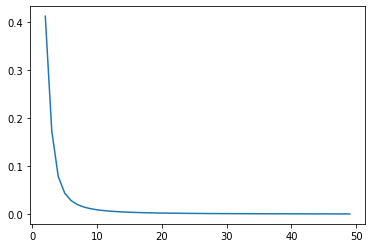

In [260]:
from matplotlib import pyplot
pyplot.plot(n_epoch[1:], loss[1:])
#pyplot.plot(series_in, relu_out)
pyplot.show()